In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
PATH = "output_90k.csv"
raw_sublinks_df = pd.read_csv(PATH, encoding='utf-8')
print(f'Total number of rows {len(raw_sublinks_df)}')

Total number of rows 80229


# TLD Analysis

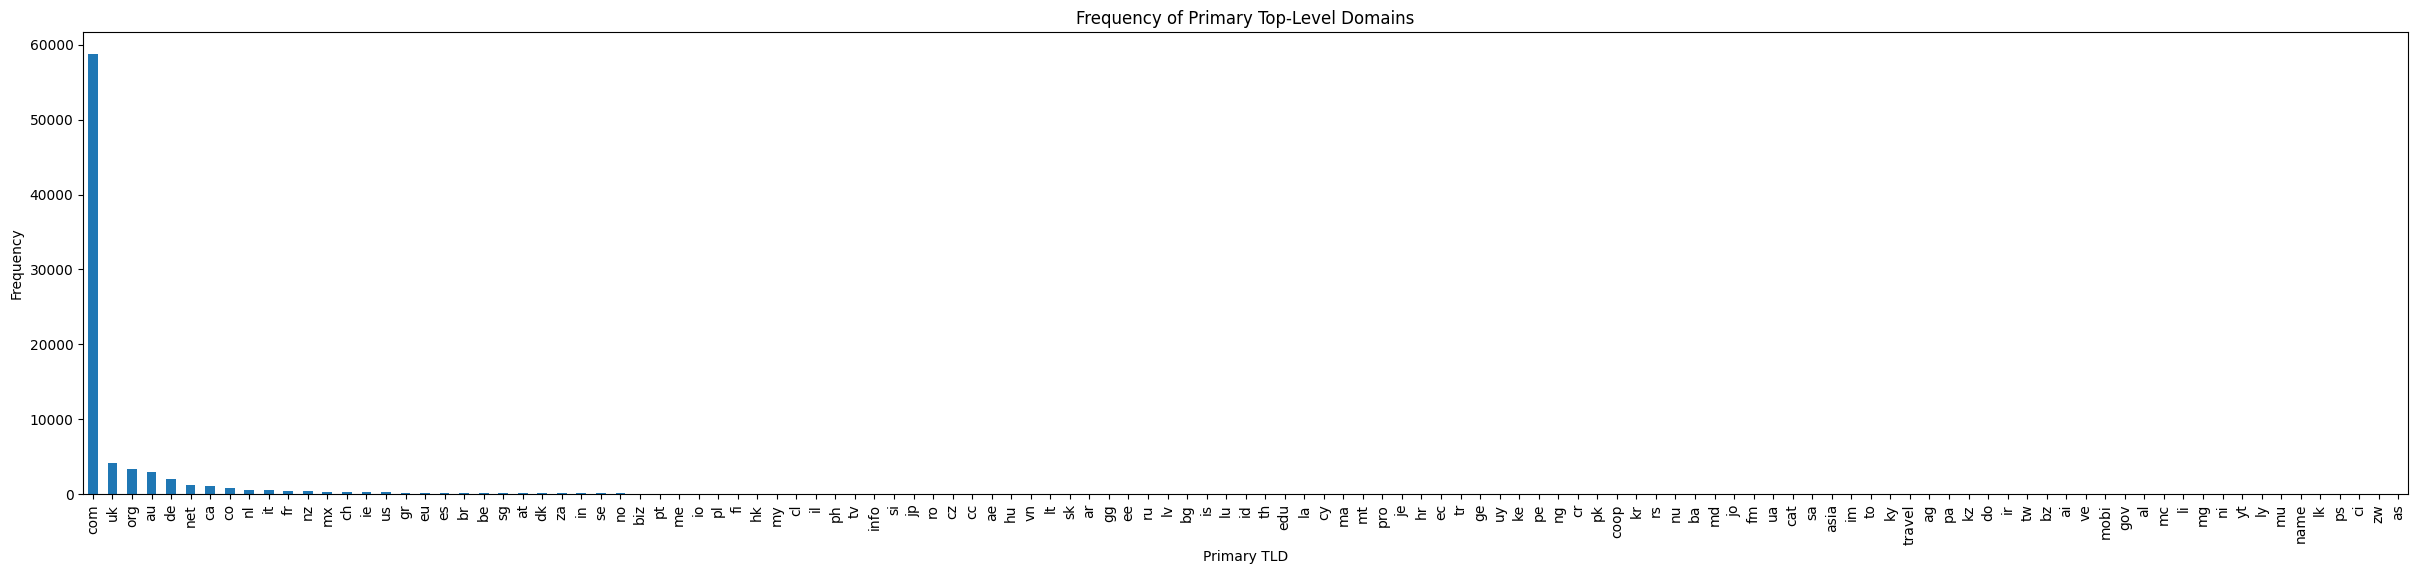

In [102]:
import tldextract
import matplotlib.pyplot as plt

# Extract primary TLD
def get_primary_tld(url):
    ext = tldextract.extract(url)
    # Extract the primary TLD from the suffix
    if ext.suffix:
        return ext.suffix.split('.')[-1]
    return ''

# Apply function to your DataFrame
raw_sublinks_df['tld'] = raw_sublinks_df['seed_url'].apply(get_primary_tld)

# Count TLD frequencies
tld_counts = raw_sublinks_df['tld'].value_counts()

# Plotting
plt.figure(figsize=(30, 6))
tld_counts.plot(kind='bar')
plt.title('Frequency of Primary Top-Level Domains')
plt.xlabel('Primary TLD')
plt.ylabel('Frequency')
plt.show()


In [103]:
tld_counts

tld
com    58735
uk      4156
org     3431
au      2917
de      2027
       ...  
lk         1
ps         1
ci         1
zw         1
as         1
Name: count, Length: 119, dtype: int64

# Pre-Analysis & Preprocessing
We can see that we managed to successfully extract the data for ~68k website, and failed for 12.5k.

In [3]:
raw_sublinks_df["error?"].value_counts()

error?
False    67798
True     12431
Name: count, dtype: int64

In [4]:
# We will analyze entries that were successfully processed i.e. encountered no errors
sublinks_df = raw_sublinks_df[raw_sublinks_df["error?"] == False]

# Preprocessing
sublinks_df["results"] = sublinks_df["results"].str.strip('[]').str.split(',')
sublinks_df["degree"] = sublinks_df["results"].apply(lambda x: len(x))

/var/folders/9f/_6775r3x22z0p4kb6_fn2xmr0000gn/T/ipykernel_11350/1432901375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sublinks_df["results"] = sublinks_df["results"].str.strip('[]').str.split(',')
/var/folders/9f/_6775r3x22z0p4kb6_fn2xmr0000gn/T/ipykernel_11350/1432901375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sublinks_df["degree"] = sublinks_df["results"].apply(lambda x: len(x))


# Error Analysis

In [9]:
errors_df = raw_sublinks_df[raw_sublinks_df["error?"] == True]

To perform error analysis, I will be anonymizing the errors, which means, I will be striping the errors of specific information like the website's url to find and condense the number of unique errors that we encountered

In [45]:
import re

def annonymize_errors(text):
    # Define the regular expression pattern to match both "url: http://[some_url]" and "host=[url]"
    pattern = r"url: [^\s]+|host=[^\s]+|Failed to resolve '[^']+'|<urllib3\.connection\.HTTPConnection object at 0x[0-9a-fA-F]+>| for '[^']+'|Connection to [^\s]+|  for "

    # Replace the matched patterns with an empty string
    return re.sub(pattern, '', text)

errors_df["clean_errors"] = errors_df["results"].apply(annonymize_errors)
errors_df.sample(20)

/var/folders/9f/_6775r3x22z0p4kb6_fn2xmr0000gn/T/ipykernel_11350/3469366716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df["clean_errors"] = errors_df["results"].apply(annonymize_errors)


,seed_url,results,error?,clean_errors
76597,http://mdfiberarts.com,HTTPConnectionPool( port=80): Max retries exce...,True,HTTPConnectionPool( port=80): Max retries exce...
63648,http://kendallnicolestudios.com,403 Client Error: Forbidden for,True,403 Client Error: Forbidden for
57049,http://www.plantjoy.squarespace.com,403 Client Error: Forbidden for,True,403 Client Error: Forbidden for
11591,http://reveurmcxi.co,402 Client Error: Payment Required for,True,402 Client Error: Payment Required for
51221,http://crushsoftball.org,403 Client Error: Forbidden for,True,403 Client Error: Forbidden for
39184,http://virtuousvessels.com,403 Client Error: Forbidden for,True,403 Client Error: Forbidden for
1830,http://londonblockchainlabs.com,520 Server Error:,True,520 Server Error:
60670,http://polkadotdesign.com,HTTPSConnectionPool( port=443): Max retries ex...,True,HTTPSConnectionPool( port=443): Max retries ex...
25512,http://edwincoespirits.com,403 Client Error: Forbidden for,True,403 Client Error: Forbidden for
33580,http://www.onyxandpetal.com,HTTPConnectionPool( port=80): Max retries exce...,True,HTTPConnectionPool( port=80): Max retries exce...


In [44]:
pprint(errors_df["clean_errors"].unique())

array(['404 Client Error: Not Found for ', 'Exceeded 30 redirects.',
       "('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))",
       '402 Client Error: Payment Required for ',
       '500 Server Error: Internal Server Error for ',
       '520 Server Error:',
       'HTTPSConnectionPool( port=443): Max retries exceeded with  (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid. (_ssl.c:1006)")))',
       'HTTPConnectionPool( port=80): Max retries exceeded with  (Caused by NameResolutionError(":  ([Errno -2] Name or service not known)"))',
       '403 Client Error: Forbidden for ',
       'HTTPConnectionPool( port=80): Max retries exceeded with  (Caused by NameResolutionError(":  ([Errno -3] Temporary failure in name resolution)"))',
       "HTTPSConnectionPool( port=443): Max retries exceeded with  (Caused by SSLError(SSLCertVerificationError(

In [46]:
sublinks_df[sublinks_df["degree"] == 1]

,seed_url,results,error?,degree
5,http://capstoneresumes.com,['[post id=227]'],False,1
11,http://goslg.com,[],False,1
44,http://annahawkinsmusic.com,[],False,1
52,http://www.casadesignfurniture.com,[],False,1
60,http://pointerbeefarm.com,[],False,1
...,...,...,...,...
80170,http://thespacegypsy.com,[],False,1
80177,http://britbratgfx.com,[],False,1
80203,http://dannyboypipes.com,[],False,1
80204,http://www.luxurytiaras.com,[],False,1


## Errors:


- ### 404 Error

    The following website `http://wiserpiercing.com` returned `Sorry, this store is currently unavailable.`

- ### Exceeded 30 redirects.
    The following website `http://www.johnsotomusic.com/`, after debugging using the `Chrome Console` in Developer tools, we found out that a `301 error` was returned, which means that the website has moved permanantly

- ### 403 Error

    The following website `https://www.cincinnatilinks.org/` returned the error in question, which might indicate that the server understood that some code was requesting the content and decided to refuse to return any data.
    After debugging in the network log we saw that the first request had returned with an error code of `301`, but I got redirected to the new address in which the website worked as expected.

- ### Dynamic Websites

    It's important to mention that some entries that had `error? == False` also encountered some problem, like the following webiste `https://www.capstoneresumes.com/`, which returned the following sublinks `'[post id=227]'`, which indicated that the website is probably indicates that the website is dynamic and builds itself "slowly" using `Javascript`


In [48]:
sublinks_df = sublinks_df[sublinks_df["degree"] > 1]

# Degrees of the webpages

The degree of a website is defined as the number of links each website (more specifically the landing page) points to, under its own name.

As an example,

The website `www.example.com` points to `www.example.com\products` - is counted as a link

however,

The website `www.example.com` points to `www.facebook.com\example` - is **not** counted as a link

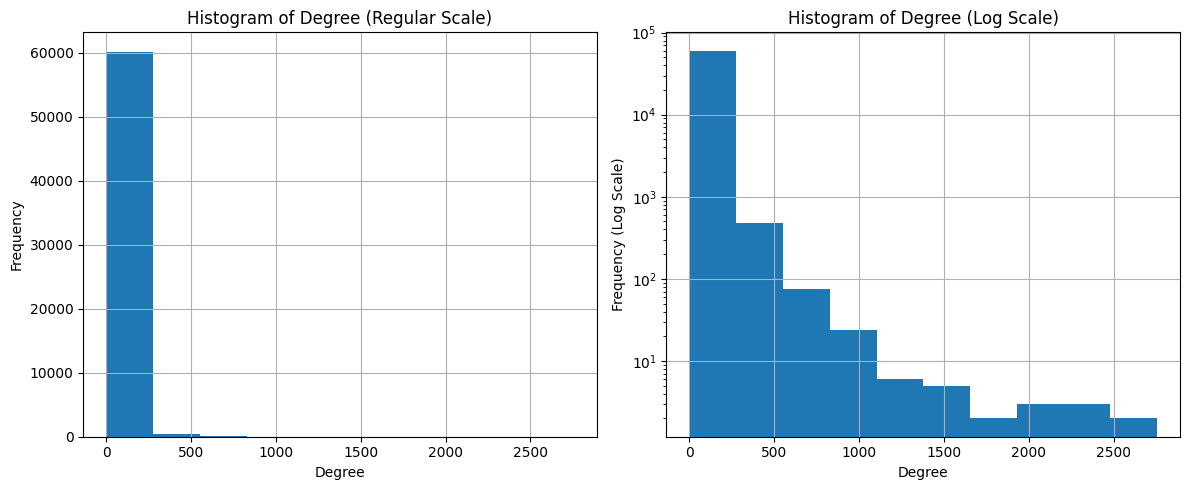

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram with a regular scale
sublinks_df['degree'].hist(bins=10, ax=axs[0])
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Degree (Regular Scale)')

# Plot the second histogram with a logarithmic scale
sublinks_df['degree'].hist(bins=10, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Frequency (Log Scale)')
axs[1].set_title('Histogram of Degree (Log Scale)')

# Display the histograms
plt.tight_layout()
plt.show()

We can see that plots resemble the Power Law phenomenon, we'll dig deeper

Calculating best minimal value for power law fit


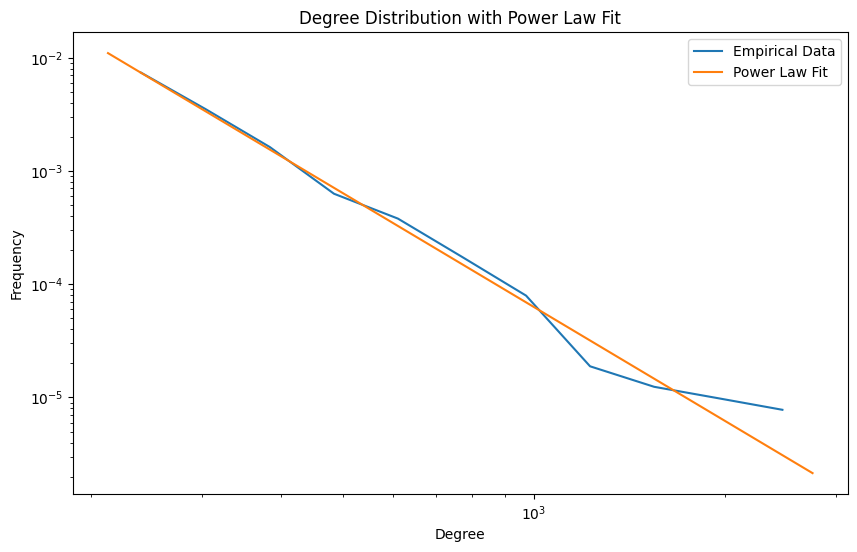

In [50]:
import powerlaw

# Fit the degree distribution to a power law
fit = powerlaw.Fit(sublinks_df["degree"])

# Plot the degree distribution and the power law fit
plt.figure(figsize=(10, 6))
fit.plot_pdf(label='Empirical Data')
fit.power_law.plot_pdf(label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with Power Law Fit')
plt.legend()
plt.show()

In [52]:
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio: {R}, p-value: {p}")

R, p = fit.distribution_compare('power_law', 'lognormal')
print(f"Log-likelihood ratio: {R}, p-value: {p}")

Log-likelihood ratio: 104.9704662007771, p-value: 1.937631444407535e-06
Log-likelihood ratio: -0.28976646729741873, p-value: 0.6591903808904087


## Comparison with Exponential Distribution


- **Log-likelihood ratio: 104.9704662007771**

    This large positive value indicates that the power law distribution fits the data significantly better than the exponential distribution.

- **p-value: 1.93e-06 ~ 0**

    This very small p-value (much less than 0.05) indicates that the difference in fit between the power law and the exponential distribution is statistically significant. Therefore, we can confidently say that the power law distribution is a better fit than the exponential distribution for your data.


## Comparison with Lognormal Distribution

- **Log-likelihood ratio: -0.2897**

    This small negative value suggests that the lognormal distribution fits the data slightly better than the power law distribution, but the difference is minimal.
- **p-value: 0.6591**

    This large p-value (much greater than 0.05) indicates that the difference in fit between the power law and the lognormal distribution is not statistically significant. Therefore, we cannot confidently say that the lognormal distribution is a better fit than the power law distribution based on this data.

***Thus***

From the quick analysis above, we can clearly see that the degrees or the number of links each website points to (in the homepage) follows the power law.


# Basic Site mapping

In [56]:
sublinks_df.sample(20)

,seed_url,results,error?,degree
42980,http://notiee.de,"['pages/widerrruf', 'pages/versanddetails', ...",False,10
3570,http://pac-hs.co.uk,['product-category/carrier-bags/twisted-paper-...,False,78
14582,http://shoplenus.com,"['collections/natural-body-cream', 'cart', '...",False,27
28467,http://baumguitars.com,"['category/original-series', 'cart', 'catego...",False,26
53610,http://shuclothes.com,"['run/run-woman-tights', 'run', 'woman/woman...",False,155
45695,http://officialbossmerch.bigcartel.com,"['product/og-bosslady-hat', 'product/og-boss-...",False,6
59898,http://auburnart.com,"['pages/contact-us', 'collections/all-tailgat...",False,45
73774,http://www.naturalicbd.de,"['blogs/news', 'pages/uber-uns', 'collection...",False,25
1336,http://nobbyhub.com,"['my-account', 'cart', 'collections/weighted...",False,8
73267,http://www.spaorder.com,"['collections/silverfox', 'collections/spa-co...",False,91


## Example and function def

In [58]:
from pprint import pprint
# _l = ['collections/fuel-filters/products/13-17-cummins-fuel-filter-replacement-kit',
#       'products/copy-of-2003-2022-bmp-5-9-6-7-2nd-gen-swap-kit', 
#       'collections/fuel-filters/products/rear-bmp-ford-water-separator-filter-replacement', 
#       'products/bmp-add-on-fuel-heater-coming-soon', 
#       'collections/apparel/products/bmp-diesel-company-threads', 
#       'products/94-02-dodge-cummins-63mm-billet-drop-in', 
#       'collections/featured-products/products/bmp-high-performance-5-air-filter', 
#       'collections/new-product-releases/products/bmp-6-7-cummins-open-air-heater-grid-plate', 
#       'collections/turbo-kits', 
#       'collections/featured-products/products/01-16-duramax-cat-fuel-filter-housing', 
#       'collections/apparel', 
#       'collections/fuel-filters/products/17-ford-powerstroke-cat-fuel-filter-replacement', 
#       'collections/featured-products/products/17-22-6-7-powerstroke-rear-cat-fuel-filter-adapter', 
#       'collections/featured-products/products/19-24-ram-2500-3500-bmp-fender-support-bars', 
#       'collections/turbocharger/products/6-7-cummins-s366-t4i-vgt-delete-turbo']

_l = ['lessons', 'cart', 'contact', 'epk', 'about-1', 'events-media', 'events-1', 'events', 'yoga-classes-workshops', 'media', 'yoga', 'store', 'about']
def build_dict(l, depth=3):
    page_map = {f"{i}_order": set() for i in range(1, depth + 1)}
    for route in l:
        [page_map[f"{j+1}_order"].add(a.strip().strip("''")) for j, a in enumerate(route.split("/")) if j+1 <= depth]
    
    return page_map

pprint(build_dict(_l, depth=3))



{'1_order': {'about',
             'about-1',
             'cart',
             'contact',
             'epk',
             'events',
             'events-1',
             'events-media',
             'lessons',
             'media',
             'store',
             'yoga',
             'yoga-classes-workshops'},
 '2_order': set(),
 '3_order': set()}


In [59]:
DEPTH = 3
sublinks_df["site_dict"] = sublinks_df["results"].apply(lambda x: build_dict(x, depth=DEPTH))
sublinks_df

,seed_url,results,error?,degree,site_dict
0,http://nataliehuggins.com,"['lessons', 'cart', 'contact', 'epk', 'abo...",False,13,"{'1_order': {'about', 'cart', 'about-1', 'cont..."
1,http://fauxynaturalhaircare.com,"['cart', 'products/deep-conditioner', 'produ...",False,13,"{'1_order': {'products', 'cart', 'collections'..."
2,http://winkeyless.kr,"['product/b-mini-ex-x2-pcb', 'cart', 'produc...",False,34,"{'1_order': {'product-category', 'cart', 'prod..."
3,http://anna-goodman.com,['cdn/shop/products/ANNAGOODMANBLEUMARINEtexti...,False,75,"{'1_order': {'cart', 'policies', 'collections'..."
4,http://darrenbooth.com,"['googleportraits', 'cart', 'work', 'portra...",False,11,"{'1_order': {'cart', 'portraits', 'surfacedesi..."
...,...,...,...,...,...
80224,http://ninesoptics.com,"['pages/catalog', 'policies/refund-policy', ...",False,33,"{'1_order': {'cart', 'discount', 'policies', '..."
80225,http://craftbytommy.bigcartel.com,"['products', 'product/coaster', 'product/bir...",False,8,"{'1_order': {'products', 'contact', 'product',..."
80226,http://www.shop-dosier-technik.de,"['c/fundgrube', 'l/cookiepolicy', 'epages/bd...",False,15,"{'1_order': {'c', 'cart', 'l', 'epages'}, '2_o..."
80227,http://pharmakinisis.gr,"['product-category/woman/makeup/lips', 'produ...",False,337,{'1_order': {'%cf%80%ce%bf%ce%b9%ce%b1-%ce%b5%...


# Todo
- Wordcloud per route - Done
- count number of routes - 
- Error analysis per reason (404, dynamic, ...) - Done
- tld analysis - Done
- delimeters in urls (-, _, ....) - kinda done

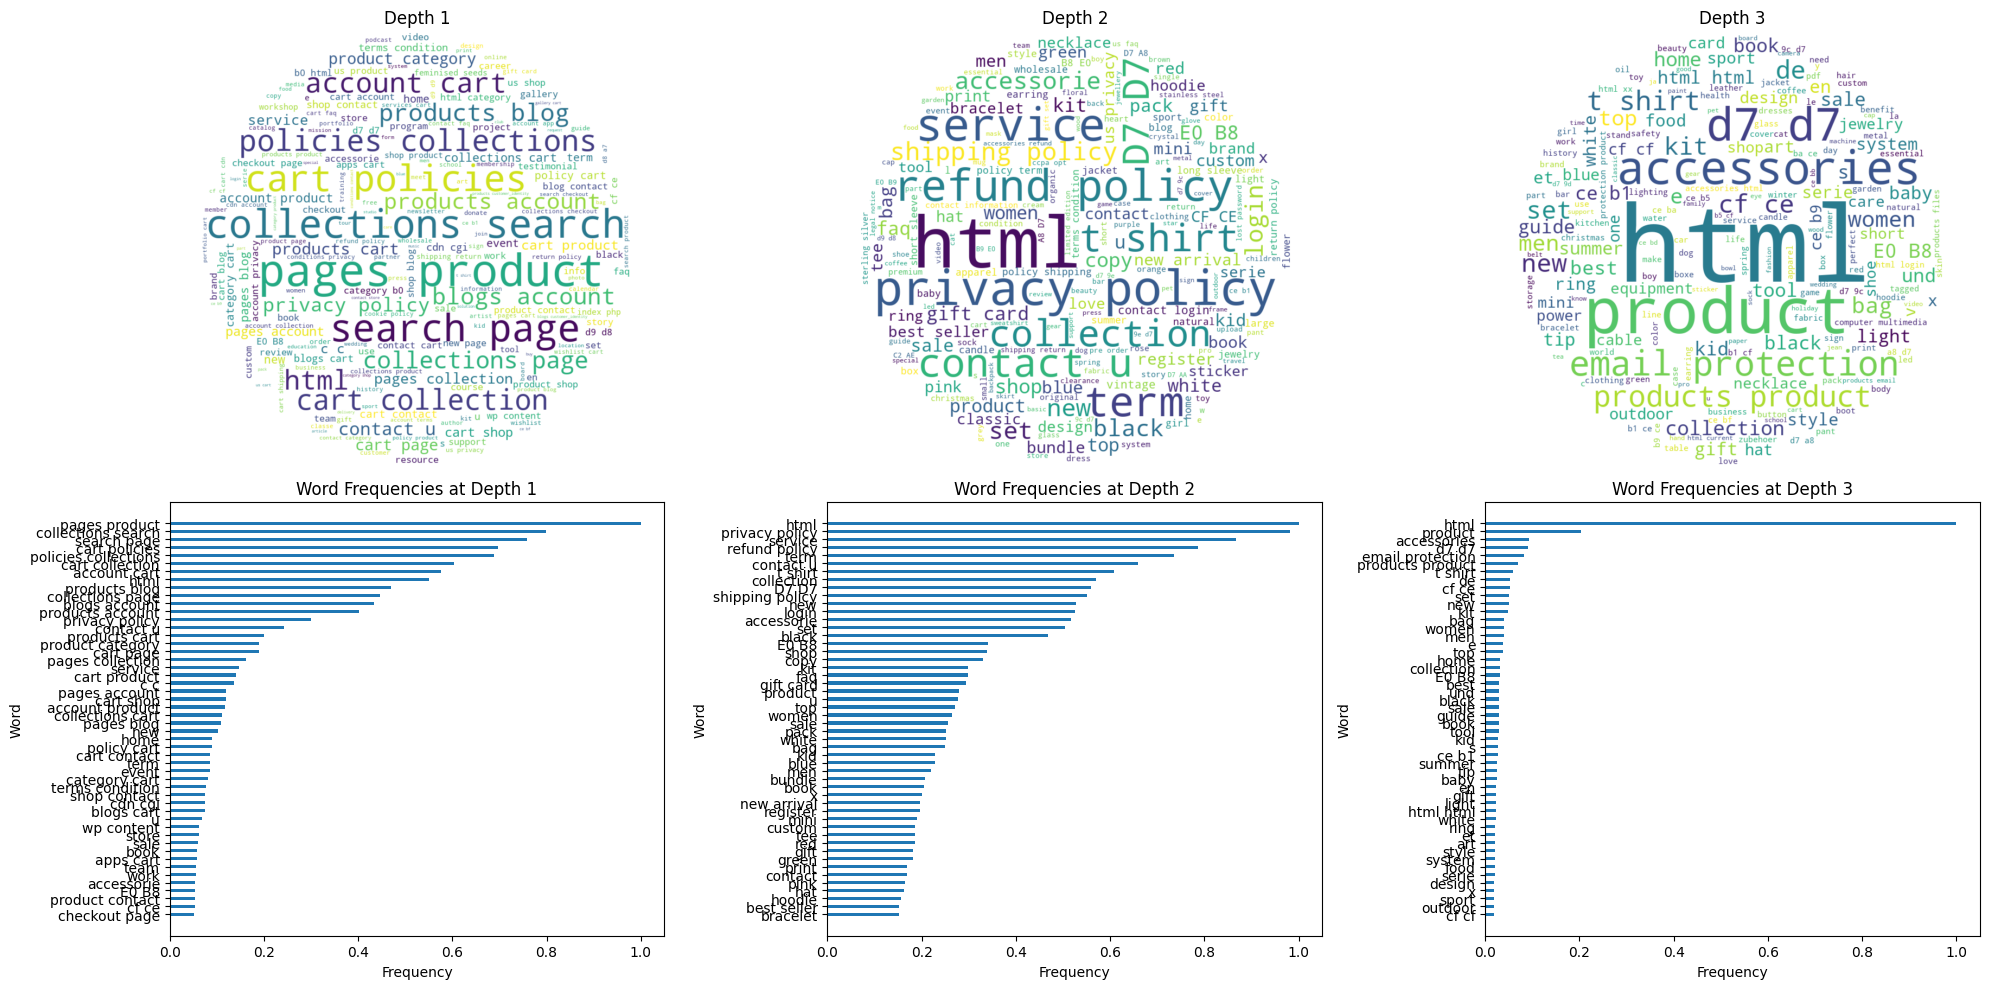

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Create a circular mask
def create_circular_mask(diameter):
    radius = diameter // 2
    y, x = np.ogrid[:diameter, :diameter]
    mask = (x - radius) ** 2 + (y - radius) ** 2 > radius ** 2
    mask = 255 * mask.astype(int)  # convert boolean mask to int and scale to 255
    return mask

# Initialize the figure
fig, axes = plt.subplots(2, DEPTH, figsize=(20, 10))
resolution = 50

# Create a circular mask of the desired size
mask = create_circular_mask(800)

for d in range(1, DEPTH + 1):
    list_of_sets = list(map(lambda x: x[f"{d}_order"], sublinks_df["site_dict"].values.tolist()))
    all_words = ' '.join([word for word_set in list_of_sets for word in word_set])

    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask).generate(all_words)

    # Display the word cloud
    ax = axes[0, d - 1]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Depth {d}')

    # Plot word frequencies on the bottom
    word_freq = wordcloud.words_
    words = list(word_freq.keys())[:resolution]
    values = list(word_freq.values())[:resolution]

    ax_bar = axes[1, d - 1]
    ax_bar.barh(words, values, height=0.4)  # Increase height to add space between bars
    ax_bar.set_xlabel('Frequency')
    ax_bar.set_ylabel('Word')
    ax_bar.set_title(f'Word Frequencies at Depth {d}')
    ax_bar.invert_yaxis()  # Invert y axis to have the highest frequency on top

plt.tight_layout()
plt.show()


In [119]:

_DELIMITER_MAPPING = {
    "hyphen": "-",  # Used for word separation in URLs, improving readability and SEO.
    "under_score": "_",  # Used for word separation but less SEO-friendly compared to hyphens.
    "slash": "/",  # Indicates hierarchical structure in URLs, separating directories and path segments.
    "dot": ".",  # Separates domain name parts, file extensions, or subdomains.
    "comma": ",",  # Separates list items or parameters within a query string.
    "semi_colon": ";",  # Separates multiple parameters or segments in URLs.
    "colon": ":",  # Separates protocol from domain, indicates port numbers, or defines custom protocols.
    "percent": "%",  # Represents URL encoding for special or non-ASCII characters.
    "question_mark": "?",  # Marks the beginning of the query string in a URL.
    "ampersand": "&",  # Separates multiple query parameters in a URL.
    "hash": "#",  # Indicates a fragment or anchor within the page.
}

for _del_name, _delimiter in _DELIMITER_MAPPING.items():
    sublinks_df[_del_name] = sublinks_df["results"].apply(lambda x: sum([link.count(_delimiter) for link in x]))

In [139]:
for _del_name, _delimiter in _DELIMITER_MAPPING.items():
    print(f'There are {len(sublinks_df[sublinks_df[_del_name] > 0]):}\t urls that contain the delimiter: {_del_name} ({_delimiter})')

There are 58345	 urls that contain the delimiter: hyphen (-)
There are 5696	 urls that contain the delimiter: under_score (_)
There are 51144	 urls that contain the delimiter: slash (/)
There are 7091	 urls that contain the delimiter: dot (.)
There are 0	 urls that contain the delimiter: comma (,)
There are 13	 urls that contain the delimiter: semi_colon (;)
There are 231	 urls that contain the delimiter: colon (:)
There are 2317	 urls that contain the delimiter: percent (%)
There are 0	 urls that contain the delimiter: question_mark (?)
There are 323	 urls that contain the delimiter: ampersand (&)
There are 0	 urls that contain the delimiter: hash (#)


## % Delimiter

This delimiter is usually used to encode special characters in other languages, like $\alpha$ is encoded as `%CE%B1`, but it can also encode charachters like `&` which is encoded as `%26`.

Thus  we can use this information to get a better idea of which country is the website targeted to.

In [170]:
encoded_urls_df = sublinks_df[sublinks_df["percent"] > 0]
encoded_urls_df = encoded_urls_df[["seed_url", "results"]]

encoded_urls_df

,seed_url,results
100,http://www.crispbranding.co.uk,"['collections/pens-writing', 'collections/bac..."
126,http://www.longevity-inc.com,['consumables/plasma-consumables/s45-consumabl...
141,http://apexapparel.com.au,"['products/custom-polo-shirt-sprint', 'collec..."
190,http://reginamoessmerdesign.com,"['collections/damenpullover', 'cart', 'colle..."
212,http://go-optic.com,"['girls-sunglasses', 'multifocal-contact-lens..."
...,...,...
80080,http://areygrey.com,"['products/the-system', 'products/calm-it-dow..."
80109,http://pumpdsupplements.com,"['collections/blow-outs', 'collections/naka',..."
80208,http://chaos-legion.com,"['collections/featured', 'products/dweghom-fl..."
80220,http://www.qlqueenlife.com,"['collections/9a-hair-bundles', 'collections/..."


## `extract_lang` 

The following function takes a list of links that have the `%` delimiter and will extract the website's language.

It will do so by first decoding the encoded string found in the url, then we will use a library to extract the language of the text.

This will be done for every link, or a pre determined number of links (since the operation is slow).

Since websites are more likely to have more links to english sublinks, we will determine the website's language as follows:

- if all links are in english then the website is in english

- if there exists a subset of non english languages we pick the most common non english language

Results are decent but unfortunatly not perfect as can be seen below

In [234]:
import urllib.parse
from langdetect import detect
import langdetect

def extract_lang(encoded_list, limit=9):
    extract_encoded_parts = lambda url: ''.join(re.findall(r'%[0-9A-Fa-f]{2}', url))
    def _get_lang(x):
        try:
            return detect(urllib.parse.unquote(x.strip().split("/")[-1]))
        except langdetect.LangDetectException:
            # Most common language
            return "en"
        
    most_common = lambda lst: max(set(lst), key=lst.count)

    langs = list(map(_get_lang, encoded_list[:limit]))

    if all([l == "en" for l in langs]):
        return "en"
    else:
        filtered_langs = [l for l in langs if l != "en"]
        if len(langs) == 0:
            print(langs)
            assert False
        return most_common(filtered_langs)


encoded_urls_df["lang"] = encoded_urls_df["results"].apply(extract_lang)
encoded_urls_df


,seed_url,results,lang
100,http://www.crispbranding.co.uk,"['collections/pens-writing', 'collections/bac...",fr
126,http://www.longevity-inc.com,['consumables/plasma-consumables/s45-consumabl...,fr
141,http://apexapparel.com.au,"['products/custom-polo-shirt-sprint', 'collec...",it
190,http://reginamoessmerdesign.com,"['collections/damenpullover', 'cart', 'colle...",no
212,http://go-optic.com,"['girls-sunglasses', 'multifocal-contact-lens...",ca
...,...,...,...
80080,http://areygrey.com,"['products/the-system', 'products/calm-it-dow...",af
80109,http://pumpdsupplements.com,"['collections/blow-outs', 'collections/naka',...",lv
80208,http://chaos-legion.com,"['collections/featured', 'products/dweghom-fl...",sv
80220,http://www.qlqueenlife.com,"['collections/9a-hair-bundles', 'collections/...",no


In [236]:
encoded_urls_df.sample(20)

,seed_url,results,lang
50812,http://marine-outfitters.com,['s/search/products/category/Maintenance/brand...,es
78856,http://accepta.com,['./water-treatment-chemicals/reverse-osmosis-...,fi
74330,http://www.signaturestaff.com.au,"['townsville-recruitment-agency', '4401%205148']",en
41595,http://cosgene.org,"['pages/%E9%9D%92%E6%98%A5%E9%96%8B%E9%96%80',...",ko
22512,http://youngtravelersclub2020.com,['collections/frontpage/products/reversible-ho...,ro
66440,http://store.hikukastel.net,"['product-category/stickerbooks', 'product/%e...",sw
8061,http://insideupgames.com,"['game-design-submissions', 'cart', 'retaile...",ro
55925,http://vaultagame.com,"['collections/youtube', 'policies/privacy-pol...",af
9574,http://leveso.dk,"['xiaomi-redmi-note-10-5g-tilbehør', 'samsung...",no
56801,http://www.eaglemotorsportsaz.com,"['new-models/bentley-pontoons-935', 'factory-...",sv


In [1]:
sublinks_df

NameError: name 'sublinks_df' is not defined